# **Intro to Python for Data Analysis**
## Chapter 4: Data Cleaning
---
**Author:** Juan Martin Bellido  

**About**  
The data we work with is not always clean. On this chapter, we go though most common data cleaning operations.

**Feedback?** Please share on [LinkedIn](https://www.linkedin.com/in/jmartinbellido/)  


## Table of Contents
---
1. Opearating null values
2. Handling duplicated values
3. Identifying outliers
4. Cleaning for text mining
5. Exercises


Conventions used in this document

> 👉 *This is note*

> ⚠️ *This is a warning*

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from scipy import stats

# 1. Operating null values
---

A null (NA) value is that for which we do not have available information. We usualy encounter NA values; these can be caused by isses when capturing, storing or manipulating data.





In [ ]:
# importing df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

### Identifying null values in a DataFrame

The first step is to check if there are indeed null values in the DataFrame and identify on which field.

There are two functions that will help us with this,

```
isna(object)
```
> 👉 *The isna() method test if values are NaN (True) or not (False)*

```
any(boolean object)
```
> 👉 *The any() method test if at least one of the boolean elements is True*










In [ ]:
# step 1: we use the isna() method to test for NA values in the dataFrame
nan_values = df_jamesbond.isna() # testing for NAs
nan_values 

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Dr. No,False,False,False,False,False,False
From Russia with Love,False,False,False,False,False,False
Goldfinger,False,False,False,False,False,False
Thunderball,False,False,False,False,False,False
Casino Royale,False,False,False,False,False,True
You Only Live Twice,False,False,False,False,False,False
On Her Majesty's Secret Service,False,False,False,False,False,False
Diamonds Are Forever,False,False,False,False,False,False
Live and Let Die,False,False,False,False,False,True


In [ ]:
# step 2: testing if at least one value on each column is True (NA)
df_jamesbond.isna().any() 
# as result, we understand that there are at least one null observation on field "Bond Actor Salary"

Year                 False
Actor                False
Director             False
Box Office           False
Budget               False
Bond Actor Salary     True
dtype: bool

### Operate null values in a dataFrame

Once we identify null values, we can decide either to:
*   *remove full rows with at least one missing value*; or 
*   *fill null values* 






In [ ]:
# we identified NA values in column "Bond Actor Salary", we will now proceed to omit those rows
cond = df_jamesbond["Bond Actor Salary"].isnull()
df_jamesbond[-cond] # we negate condition to omit those rows that are NA for column "Bond Actor Salary"

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2
Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4
On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6
Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8
Octopussy,1983,Roger Moore,John Glen,373.8,53.9,7.8
A View to a Kill,1985,Roger Moore,John Glen,275.2,54.5,9.1


In [ ]:
# alternatively, we can opt to fill NAs
# we will proceed to fill NAs with the mean value for the variable
median_bond_salary = df_jamesbond["Bond Actor Salary"].mean() # we calculate the mean
df_jamesbond["Bond Actor Salary"]=df_jamesbond["Bond Actor Salary"].fillna(median_bond_salary) # we replace null values

# Note: in some other cases, we might just want to replace null values by 0 -> .fillna(0)

# 2. Handling duplicated values
---

In [ ]:
# Import dataframe
df_duplicates = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/renfe_estaciones_duplicates.csv")

### Identify duplicated values

Key functions in this section,
```
object.duplicated()
```
> The `duplicated()` method test if a row is an exact duplicate



In [ ]:
len(df_duplicates) # check number of rows

630

In [ ]:
# identify duplicated rows
cond = df_duplicates.duplicated()
df_duplicates[cond]

,CODIGO,DESCRIPCION,LATITUD,LONGITUD,DIRECCION,C.P.,POBLACION,PROVINCIA,PAIS
16,5000,GRANADA,37.184036,-3.609036,AVENIDA DE LOS ANDALUCES. S/N,18014.0,Granada,Granada,España
24,10204,ZARZALEJO,40.538817,-4.158073,CALLE DEL FERROCARRIL. S/N,28293.0,Zarzalejo,Madrid,España
57,11208,VITORIA/GASTEIZ,42.841528,-2.672665,PLAZUELA DE LA ESTACION. 1,1005.0,Vitoria-Gasteiz,Araba/Álava,España
74,11203,MANZANOS,42.742875,-2.867530,RIO ZADORRA KALEA. S/N,1220.0,Ribera Baja/Erribera Beitia,Araba/Álava,España
90,15006,CISNEROS,42.191068,-4.850206,CARRETERA P-932 - ESTACION FERROCARRIL. S/N,34320.0,Cisneros,Palencia,España
181,23004,PONTEVEDRA,42.421640,-8.635830,AVENIDA DE LA ESTACION. S/N,36003.0,Pontevedra,Pontevedra,España
222,31205,A GUDIÑA,42.060690,-7.132436,CARRETERA N-525 - BEATO SEBASTIAN APARICIO. S/N,32540.0,Gudiña. A,Ourense,España
227,34005,SAN PEDRO DEL ARROYO,40.803838,-4.871408,CALLE ESTACION FERROCARRIL. S/N,5350.0,San Pedro del Arroyo,Ávila,España
242,35206,NAVALMORAL DE LA MATA,39.894854,-5.545566,PLAZA ESTACION FERROCARRIL. 1,10300.0,Navalmoral de la Mata,Cáceres,España
253,37300,PUERTOLLANO,38.691411,-4.111611,CALLE MUELLE. S/N,13500.0,Puertollano,Ciudad Real,España


### Remove duplicated values


Key functions in this section,
```
object.drop_duplicates()
```
> The `drop_duplicates()` method removes duplicated rows

In [ ]:
df_clean = df_duplicates.drop_duplicates() # we remove duplicates and store the output in a new object

In [ ]:
len(df_clean) # we check again number of rows to confirm new number

620

# 3. Identifying outliers
---


In [ ]:
# import dataframe
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

An outlier is a numerical value that differs significantly from the rest of observations. It is important to identify outliers to check for possible data entry errors or simply to explore the dataset to build insight.






### Using normal distribution (z)

There are different methods to identify outliers. For this method, we will assume that the variable is normally distributed. By convention, a value with a z score higher than +3 or lower than -3 would indicate that the value is an outlier.

> *Note: a value higher/lower than +/- 3 means that it's +/- standard deviations far from the mean.*

Key functions in this section,

```
stats.zscore(column, nan_policy='omit')
```
> *The szcore() method normalizes (converts) a numerical variable into Z (normal distribution)*






In [ ]:
# We normalize variable Box Office to check outliers
df_jamesbond["z_Box Office"] = stats.zscore(df_jamesbond["Box Office"],nan_policy='omit').round(2)

In [ ]:
# We select variable and its normalized version and sort
df_jamesbond[["Box Office","z_Box Office"]].sort_values("z_Box Office",ascending=False)
# Note: we do not find any outliers, as there are not Z score values higher than 3 or lower than -3

,Box Office,z_Box Office
Film,,
Skyfall,943.5,2.61
Thunderball,848.1,2.06
Goldfinger,820.4,1.90
Spectre,726.7,1.36
Casino Royale,581.5,0.52
From Russia with Love,543.8,0.30
Moonraker,535.0,0.25
The Spy Who Loved Me,533.0,0.24
GoldenEye,518.5,0.16


### Interquartile range (IQR)

The IQR is an alternative method to identify outliers, which does not assume normal distribution. This is particularly useful when operating with datasets with few rows. 

Accordind to this method, we consider outliers those values that deviates more than *1.5 x IQR*, whereas the IQR is the difference between the first and third quantile.



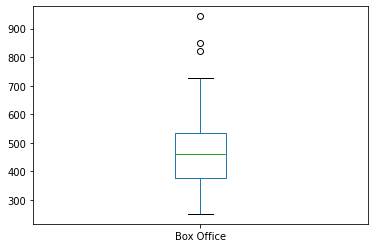

In [ ]:
# Plotting a boxplot
df_jamesbond.boxplot(
  column='Box Office',
  grid=False 
)
# note: a boxplot automatically identifies outliers using the IQR method

In [ ]:
# Calculating quantiles
dist_min = df_jamesbond["Box Office"].quantile(0)
dist_Q1 = df_jamesbond["Box Office"].quantile(0.25)
dist_median = df_jamesbond["Box Office"].quantile(0.5)
dist_Q3 = df_jamesbond["Box Office"].quantile(0.75)
dist_max = df_jamesbond["Box Office"].quantile(1)

In [ ]:
# Calculating IQR
# visually, the IQR is the "size of the box" 
IQR = (dist_Q3-dist_Q1)

In [ ]:
# Building a condition to filter for outliers
cond = df_jamesbond["Box Office"] > (IQR * 1.5) + dist_Q3

In [ ]:
# Filtering and sorting
df_jamesbond[cond].sort_values("Box Office",ascending=False)

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5
Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2


# 4. Cleaning for text mining
---

We often face situations on which we need to transform data stored on a text field, so that we separate values in multiple columns.

In [ ]:
df_amzn_products = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_products.txt",sep="\t")
df_amzn_products.dtypes

asin          object
brand         object
categories    object
dtype: object

In [ ]:
df_amzn_products = df_amzn_products.head(10)

In [ ]:
# using the .str.split() method to expand values in multiple columns
df_amzn_products.categories.str.split(pat=",",expand=True,n=3)

,0,1,2,3
0,Electronics,Computers,Computer Accessories,"Keyboards, Mice & Joysticks,Keyboards,All Keyb..."
1,Electronics,Portable Audio & Video,Home Audio & Theater,"Home Audio,All Home Speakers,Speaker Systems,C..."
2,Audio & Video Accessories,TV Mounts,TV Accessories & Parts,"Electronics,A/V Presentation,Accessories & Sup..."
3,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Portable Audio & Video,"Electronics,Portable Speakers & Docks,Audio,Al..."
4,Photography,Photography Bags Cases,Camera Bags,"Backpacks,Backpacks ffvzrevebzuqvcddwzzxeuwva,..."
5,Computers,Memory (RAM),Computers & Accessories,"Computer Components,Memory,Memory Upgrades,Ele..."
6,Portable Bluetooth Speakers,Stereos,Computers,"Bluetooth & Wireless Speakers,Computer Accesso..."
7,Computers,Networking,Home Networking & Connectivity,"Electronics,See more Novatel Jetpack MiFi 6620..."
8,Electronics,Portable Audio,Auto & Tires,"Auto Electronics,Car Receivers,All In-Dash Ste..."
9,Electronics,Car & Vehicle Electronics,Car Electronics,"Car Audio,Speakers,Coaxial Speakers,Car Electr..."


In [ ]:
# filtering and renaming columns
df_amzn_products.categories.str.split(pat=",",expand=True,n=3)\
  .iloc[:,0:3]\
  .rename({0:"prod_cat_1",1:"prod_cat_2",2:"prod_cat_3"},axis='columns')

,prod_cat_1,prod_cat_2,prod_cat_3
0,Electronics,Computers,Computer Accessories
1,Electronics,Portable Audio & Video,Home Audio & Theater
2,Audio & Video Accessories,TV Mounts,TV Accessories & Parts
3,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Portable Audio & Video
4,Photography,Photography Bags Cases,Camera Bags
5,Computers,Memory (RAM),Computers & Accessories
6,Portable Bluetooth Speakers,Stereos,Computers
7,Computers,Networking,Home Networking & Connectivity
8,Electronics,Portable Audio,Auto & Tires
9,Electronics,Car & Vehicle Electronics,Car Electronics


In [ ]:
# Redoing operation, in this case merging the output with the original table
df_amzn_products.categories.str.split(pat=",",expand=True,n=3)\
  .iloc[:,0:3]\
  .rename({0:"prod_cat_1",1:"prod_cat_2",2:"prod_cat_3"},axis='columns')\
  .join(df_amzn_products)\
  .loc[:,['asin','brand','prod_cat_1','prod_cat_2','prod_cat_3']]

,asin,brand,prod_cat_1,prod_cat_2,prod_cat_3
0,B0168YIWSI,Microsoft,Electronics,Computers,Computer Accessories
1,"B018K251JE,B00VILQKQ8",Boytone,Electronics,Portable Audio & Video,Home Audio & Theater
2,B00C78VIUE,Sanus,Audio & Video Accessories,TV Mounts,TV Accessories & Parts
3,B075WKS4D8,Ultimate Ears,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Portable Audio & Video
4,B000YA33DC,Lowepro,Photography,Photography Bags Cases,Camera Bags
5,B00505EZYW,Corsair,Computers,Memory (RAM),Computers & Accessories
6,B00WBS31OQ,"Sdi Technologies, Inc.",Portable Bluetooth Speakers,Stereos,Computers
7,"B0172DS3ME,B00NTJKAXG",Verizon Wireless,Computers,Networking,Home Networking & Connectivity
8,B00R5WGT2E,JVC,Electronics,Portable Audio,Auto & Tires
9,B00V631478,JBL,Electronics,Car & Vehicle Electronics,Car Electronics


# 5. Exercises
---
> 👉 Solutions to exercises are available [here](https://nbviewer.org/github/SomosDataWizards/Python-Intro-Course/blob/main/Chapter_4_Exercises.ipynb)

### Exercise #1

A. Identify columns with null observations in DataFrame.  

B. Select only fields *movie_title, director_name, imdb_score*. Remove observations with null values on any of those fields.  

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv


In [ ]:
import pandas as pd
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

### Exercise #2

Identify companies that are outliers in terms of number of employees:  

A. Using normal distribution  
B. Using IQR  

> Dataset https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv

In [1]:
import pandas as pd
from scipy import stats
df_fortune = pd.read_csv('https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv')
df_fortune.dtypes

Rank          int64
Company      object
Sector       object
Industry     object
Location     object
Revenue       int64
Profits       int64
Employees     int64
dtype: object